In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math
import random 
import numpy as np
import matplotlib.pyplot as plt
from __future__ import  division

In [3]:
random.seed(27)

In [4]:
COLORS = ['red','black','yellow','green', 'purple']
NEEDLE_LENGTH = 1.0

def needle_orientation():
    '''
    Generate random center coordinates and angle of
    orientation for a random needle
    '''

    x_center, y_center = random.uniform(0,3), random.uniform(0,3)
    angle = random.random()*2*math.pi 

    return x_center, y_center, angle

def needle_construct_graph(L = NEEDLE_LENGTH, **mode):
    '''
    Given center coordinates and angle of orientation of needle construct
    needle end point coordinates by making projections on both axes
    and plot random needle of length 1 on grid
    '''

    xc, yc, theta = needle_orientation()
    x_origin = (xc - L/2)*math.cos(theta)
    y_origin = (yc - L/2)*math.sin(theta)

    x_end = (xc + L/2)*math.cos(theta)
    y_end = (yc + L/2)*math.sin(theta)

    for name, value in mode.items():
        if value is 'plot':
            plt.plot((x_origin, x_end), (y_origin, y_end), random.choice(COLORS))
        elif value is 'no_plot':
            pass

    return x_origin, x_end


def plot_grid_lines(i):
    '''
    Plot vertical grid lines with a length of 1 between lines 
    '''
    
    plt.axvline(x=i, ymin=0, ymax = 5, linewidth=2, color='blue')


def needle_length(x1, y1, x2, y2):
    '''
    Check length of random is indeed 1
    '''
    
    return (math.pow(abs(y2-y1), 2) + math.pow(abs(x2-x1), 2))**0.5

def collision_detection(x_origin, x_end, lines):
    '''
    Detect when a random needle crosses a grid line 
    '''
        
    count = 0
    for line in lines:
        if (x_origin <= line and x_end >= line) or (x_origin >= line and x_end <= line):
            count += 1
        else:
            count += 0

    return count

def calculate_pi(hits, pins, needle_length = NEEDLE_LENGTH):
    '''
    Calculate the value of pi
    '''
    
    return 2 * needle_length * (pins/hits)



In [5]:
pi_list = []

# trials = [10, 100, 1000, 10000, 50000, 100000]  # different number of trials
# trials = list(int(np.linspace(10,100000, 1000)))  # different number of trials
trials = [int(i) for i in list(np.linspace(10,100000, 1000))]
vlines = range(-4,4)

for pins in trials:
    hits = 0
    for pin in xrange(pins):   
        origin, end = needle_construct_graph(mode = 'no_plot')
        hits += collision_detection(origin, end, vlines)
    pi_list.append(calculate_pi(hits, pins)) 
    print 'hits : %d, trials: %d, estimate pi = %1.4F' %(hits, pins, calculate_pi(hits, pins)) 
 

hits : 7, trials: 10, estimate pi = 2.8571
hits : 73, trials: 110, estimate pi = 3.0137
hits : 136, trials: 210, estimate pi = 3.0882
hits : 199, trials: 310, estimate pi = 3.1156
hits : 281, trials: 410, estimate pi = 2.9181
hits : 344, trials: 510, estimate pi = 2.9651
hits : 385, trials: 610, estimate pi = 3.1688
hits : 441, trials: 710, estimate pi = 3.2200
hits : 515, trials: 810, estimate pi = 3.1456
hits : 583, trials: 910, estimate pi = 3.1218
hits : 664, trials: 1010, estimate pi = 3.0422
hits : 704, trials: 1110, estimate pi = 3.1534
hits : 793, trials: 1211, estimate pi = 3.0542
hits : 845, trials: 1311, estimate pi = 3.1030
hits : 912, trials: 1411, estimate pi = 3.0943
hits : 962, trials: 1511, estimate pi = 3.1414
hits : 1036, trials: 1611, estimate pi = 3.1100
hits : 1121, trials: 1711, estimate pi = 3.0526
hits : 1150, trials: 1811, estimate pi = 3.1496
hits : 1229, trials: 1911, estimate pi = 3.1098
hits : 1254, trials: 2011, estimate pi = 3.2073
hits : 1382, trials: 2

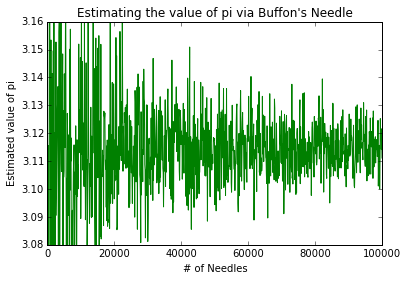

In [6]:
# plot graphs
plt.plot(trials, pi_list ,color='green')
plt.title("Estimating the value of pi via Buffon's Needle")
plt.xlabel('# of Needles')
plt.ylabel('Estimated value of pi')
plt.ylim(3.08,3.16)
plt.show()
 

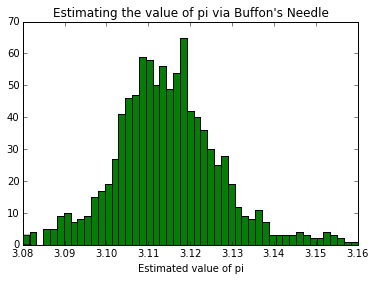

In [8]:
plt.hist(pi_list, bins = np.linspace(3.08,3.16,50), color='green')
plt.title("Estimating the value of pi via Buffon's Needle")
plt.xlabel('Estimated value of pi')
plt.xlim(3.08,3.16)
plt.show()

In [ ]:
Generate Random Needles on a Plot

hits 628
drops 1000
PI = 3.1847133758


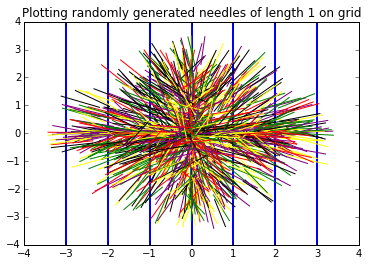

In [11]:
hits_ = 0 
num_needles = 1000

#  define grid space
for vlines in range(-4,4):
    plot_grid_lines(vlines)
    
vlines = range(-4,4)
                    
for pin in xrange(num_needles):   
    origin, end = needle_construct_graph(mode = 'plot')
    hits_ += collision_detection(origin, end, vlines)
    
# plot title
plt.title("Plotting randomly generated needles of length 1 on grid")

print 'hits', hits_
print 'drops', num_needles
print 'PI =', calculate_pi(hits_, num_needles)